In [1]:
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.stats import wilcoxon
from networkx.readwrite import json_graph

## First, we will import the networks used in our study. They are used to verif some results.

In [2]:
# Note:- These networks are the same networks used in our study. 

with open("arizona.json", "r") as f:  # Load the JSON file
    arizona_coord = json.load(f)

with open("washington.json", "r") as f:  # Load the JSON file
    washington_coord = json.load(f)

with open("kansas.json", "r") as f:  # Load the JSON file
    kansas_coord = json.load(f)
    

# Convert back to a NetworkX graph

arizona_network = json_graph.node_link_graph(arizona_coord)
washington_network = json_graph.node_link_graph(washington_coord)
kansas_network = json_graph.node_link_graph(kansas_coord)


print((arizona_network.number_of_nodes(), arizona_network.number_of_edges()))
print((washington_network.number_of_nodes(), washington_network.number_of_edges()))
print((kansas_network.number_of_nodes(), kansas_network.number_of_edges()))

(834, 1547)
(1564, 2784)
(2224, 4257)


## Now, we will load our results into the notebook.

In [3]:
with open('kmdnsp_results.pkl', 'rb') as file: # Load the dictionary from the file
    results = pickle.load(file)

## **results** is a dictionary, with unique keys representing 

1) **Network name.**
2) **Value of $K$ (Number of Paths to found and it ranges from 2 to 5).**
3) **Value of $\epsilon$ (0.01, 0.05, 0.10, 0.15, and 0.20).**

### 'arizona_5_01' means results for the arizona network, when $K$ was set to 5 and $\epsilon$ was set to 0.01.

## **For demonstration, we will be showing the results when network used was Arizona, $K$ was set to 5 and $\epsilon$ was set to 0.01.**

In [4]:
results['arizona_5_01'].keys() 

dict_keys(['node_list', 'dijkstra_results', 'elapsed_time', 'dissimilarity_values', 'time_out_counts', 'best_paths'])

## For each combination of Network, $K$ and $\epsilon$, the results dictionary include:

### 1) **Node list:- representing the randomly selected source and target node for each instance.**

In [5]:
pd.DataFrame(results['arizona_5_01']['node_list'])

,start,end
0,534,424
1,61,495
2,516,8
3,611,392
4,374,322
...,...,...
95,568,629
96,389,116
97,637,683
98,742,799


### **2) Shortest Path founded using Dijkstra's algorithm for each test instance.**

In [6]:
results['arizona_5_01']['dijkstra_results'].keys()

dict_keys(['path_list', 'len_list'])

## These results can be verified using the built-in functions from the networkx library and the graphs provided.

In [7]:
(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][0],
                  target = results['arizona_5_01']['node_list']['end'][0], 
                  weight="weight") == results['arizona_5_01']['dijkstra_results']['path_list'][0])

True

In [8]:
(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][1],
                  target = results['arizona_5_01']['node_list']['end'][1], 
                  weight="weight") == results['arizona_5_01']['dijkstra_results']['path_list'][1])

True

In [9]:
(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][10],
                  target = results['arizona_5_01']['node_list']['end'][10], 
                  weight="weight") == results['arizona_5_01']['dijkstra_results']['path_list'][10])

True

## Note:- It is also possible that the shortest path founded by dijkstras algorithm differs from the shortest path founded by Networkx. However, the path length will be the same. Some examples are shown below.

### **Example 1**

In [10]:
(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][88],
                  target = results['arizona_5_01']['node_list']['end'][88], 
                  weight="weight") == results['arizona_5_01']['dijkstra_results']['path_list'][88])

False

In [11]:
print(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][88],
                  target = results['arizona_5_01']['node_list']['end'][88], 
                  weight="weight"), nx.shortest_path_length(arizona_network, 
                        source = results['arizona_5_01']['node_list']['start'][88],
                        target = results['arizona_5_01']['node_list']['end'][88], 
                        weight="weight"))

[303, 689, 176, 177, 178, 623, 109, 158, 714, 573, 568, 572, 402, 52, 633] 457.49957794455105


In [12]:
print(results['arizona_5_01']['dijkstra_results']['path_list'][88], results['arizona_5_01']['dijkstra_results']['len_list'][88])

[303, 689, 176, 177, 178, 623, 109, 158, 714, 573, 568, 572, 402, 401, 52, 633] 457.49957794455105


### **Example 2**

In [13]:
(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][89],
                  target = results['arizona_5_01']['node_list']['end'][89], 
                  weight="weight") == results['arizona_5_01']['dijkstra_results']['path_list'][89])

False

In [14]:
print(nx.shortest_path(arizona_network,
                  source = results['arizona_5_01']['node_list']['start'][89],
                  target = results['arizona_5_01']['node_list']['end'][89], 
                  weight="weight"), nx.shortest_path_length(arizona_network, 
                        source = results['arizona_5_01']['node_list']['start'][89],
                        target = results['arizona_5_01']['node_list']['end'][89], 
                        weight="weight"))

[319, 443, 441, 101, 87, 86, 80, 65, 56] 269.16973451955477


In [15]:
print(results['arizona_5_01']['dijkstra_results']['path_list'][89], results['arizona_5_01']['dijkstra_results']['len_list'][89])

[319, 443, 441, 101, 87, 86, 65, 56] 269.16973451955477


In [16]:
# Verifying all shortest path results.

len_mis_match = 0

for comb in results.keys():
    if "arizona" in comb:
        network_in_focus = arizona_network.copy()
    elif "washington" in comb:
        network_in_focus = washington_network.copy()
    else:
        network_in_focus = kansas_network.copy()
        
    for test_count in range(len(results[comb]['dijkstra_results']['len_list'])):
    
        if (nx.shortest_path_length(network_in_focus, source = results[comb]['node_list']['start'][test_count],
                                                    target = results[comb]['node_list']['end'][test_count], 
                                                    weight="weight") != results[comb]['dijkstra_results']['len_list'][test_count]):
            
            len_mis_match +=1
        else:
            continue
    
print(f"Number of length mis match found are: {len_mis_match}.") # 6000 test instances are verified.

Number of length mis match found are: 0.


### **3) Elapsed time of each algorithm.**
### **4) Number of time outs observed for each aglorithm.**

**Note:- A time out is considered if elapsed time is equal or more than 120 seconds (Two minutes).**

In [17]:
results['arizona_5_01']['elapsed_time'].keys(), results['arizona_5_01']['time_out_counts'].keys()

(dict_keys(['ahn', 'zhang', 'mibga']), dict_keys(['ahn', 'zhang', 'mibga']))

In [18]:
mis_match = 0
correct = 0

for i in results.keys():
    time_elapse_res = results[i]['elapsed_time']
    time_out_res = results[i]['time_out_counts']
    for algo in time_elapse_res.keys(): # both dict have same keys.
        if time_out_res[algo] != time_elapse_res[algo].count(120):
            mis_match+=1
        else:
            #print(time_out_res[algo], time_elapse_res[algo].count(120))
            correct+=1
            
            
mis_match, correct # 20 combinations: 3 networks: 3 algorithms, total checks 20*3*3 = 180

(0, 180)

### **5) Dissimilarity values observed for all algorithms per test instance.**

In [19]:
results['arizona_5_01']['dissimilarity_values'].keys()

dict_keys(['ahn', 'zhang', 'mibga'])

In [20]:
pd.DataFrame(results['arizona_5_01']['dissimilarity_values']) 

,ahn,zhang,mibga
0,0.002454,0.002449,0.213040
1,0.001372,0.001118,0.193353
2,0.025305,0.000000,0.078619
3,0.035277,0.027408,0.292266
4,0.439724,0.072163,0.438492
...,...,...,...
95,0.087642,0.000000,0.087647
96,0.010049,0.015736,0.019335
97,0.098120,0.098134,0.098134
98,0.056986,0.056986,0.056986


### **6) Best paths found by each algorithm, per test instance.**

In [21]:
results['arizona_5_01']['best_paths'].keys() # 100 test instance per combination

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [22]:
results['arizona_5_01']['best_paths'][1].keys() 

dict_keys(['ahn', 'zhang', 'mibga'])

In [23]:
print(results['arizona_5_01']['best_paths'][1]['ahn'])

[([534, 103, 377, 399, 710, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 446.7796761959662), ([534, 103, 399, 710, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 446.7796761959662), ([534, 103, 399, 710, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 446.77967619596615), ([534, 103, 399, 710, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 447.3963928096807), ([534, 103, 377, 399, 710, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 446.77967619596615)]


In [24]:
print(results['arizona_5_01']['best_paths'][1]['zhang'])

[([534, 103, 377, 660, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.6265878749861), ([534, 103, 377, 660, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.00987126127166), ([534, 103, 399, 710, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.39639280968066), ([534, 103, 377, 660, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 447.62658787498617), ([534, 103, 399, 377, 660, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.6645293242741)]


In [25]:
print(results['arizona_5_01']['best_paths'][1]['mibga'])

[([534, 103, 377, 660, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.00987126127166), ([534, 103, 377, 660, 195, 540, 538, 539, 593, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 447.0098712612717), ([534, 103, 399, 710, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.39639280968066), ([534, 103, 377, 660, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 425, 424], 447.6265878749861), ([534, 103, 377, 660, 195, 540, 538, 539, 84, 148, 149, 151, 254, 253, 592, 594, 595, 504, 501, 502, 503, 628, 425, 424], 447.62658787498617)]


#

# Analysing our results.

In [26]:
# Setting colours for plots.

light_orange = mcolors.to_rgba('orange', alpha=0.75)  
light_blue = mcolors.to_rgba('blue', alpha=0.75)
light_green = mcolors.to_rgba('green', alpha=0.75)

## Non Timeout Instances

In [27]:
# Heat map for non timieout instances.

def heat_map(successful_percent):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(successful_percent).T
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(df.T, annot=True, cmap="RdYlGn", fmt="d")
    
    plt.xlabel('Algorithms', fontsize=12, labelpad=15)  # Increased font size and added space (labelpad)
    plt.ylabel(r'$(K, \epsilon)$', fontsize=12, labelpad=30, rotation=360)  # Added space and adjusted rotation
    
    # Increase tick label sizes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adjust the color bar label font size
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize = 10)  # Adjust tick label size of color bar
    colorbar.set_label('Percentage (%)', fontsize=12)  # Set color bar label and fontsize
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

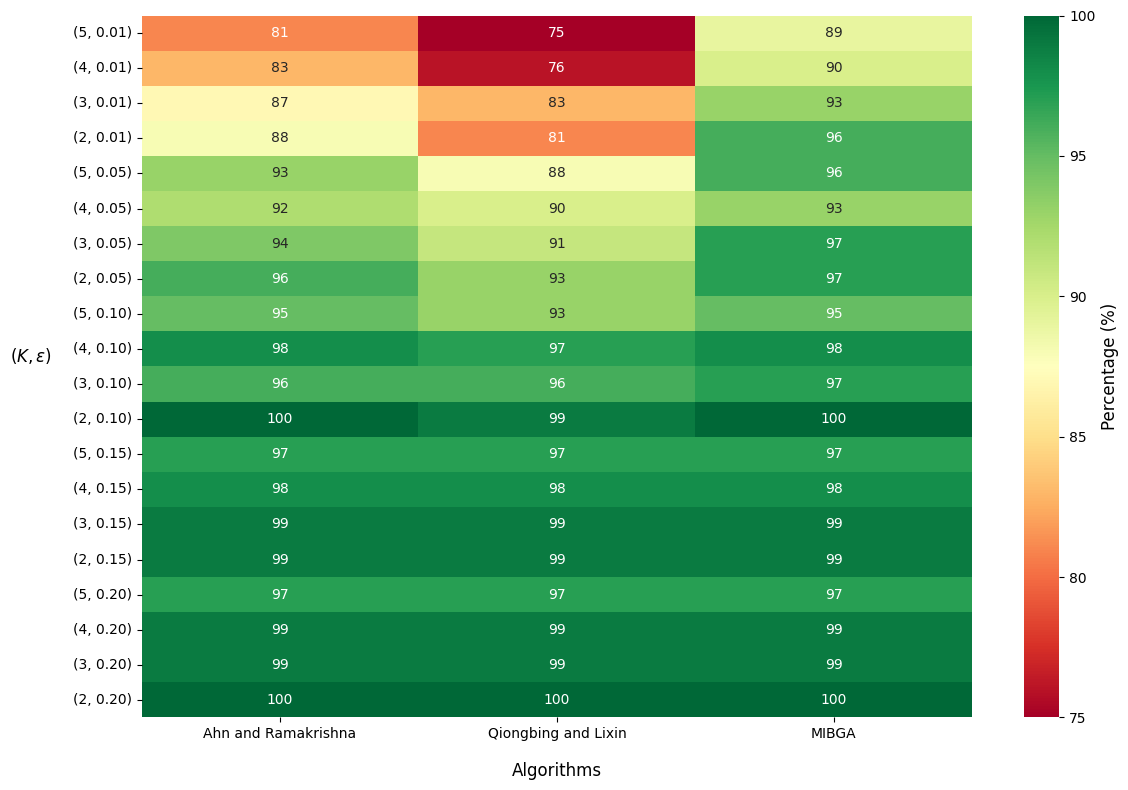

In [28]:
successful_percent = {}

key_to_use = {'5_01': '(5, 0.01)', '4_01': '(4, 0.01)', '3_01': '(3, 0.01)', '2_01': '(2, 0.01)',
              '5_05': '(5, 0.05)', '4_05': '(4, 0.05)', '3_05': '(3, 0.05)', '2_05': '(2, 0.05)',
              '5_10' : '(5, 0.10)', '4_10' : '(4, 0.10)', '3_10' : '(3, 0.10)', '2_10' : '(2, 0.10)',
              '5_15': '(5, 0.15)', '4_15': '(4, 0.15)', '3_15': '(3, 0.15)', '2_15': '(2, 0.15)', 
              '5_20' : '(5, 0.20)', '4_20' : '(4, 0.20)', '3_20' : '(3, 0.20)', '2_20' : '(2, 0.20)'}



unsuccessful_count = {"Ahn and Ramakrishna": {'(5, 0.01)': 0, '(4, 0.01)': 0, '(3, 0.01)': 0, '(2, 0.01)': 0,
                                              '(5, 0.05)': 0, '(4, 0.05)': 0, '(3, 0.05)': 0, '(2, 0.05)': 0, 
                                              '(5, 0.10)': 0, '(4, 0.10)': 0, '(3, 0.10)': 0, '(2, 0.10)': 0,
                                              '(5, 0.15)': 0, '(4, 0.15)': 0, '(3, 0.15)': 0, '(2, 0.15)': 0, 
                                              '(5, 0.20)': 0, '(4, 0.20)': 0, '(3, 0.20)': 0, '(2, 0.20)': 0},
                      
                        "Qiongbing and Lixin": {'(5, 0.01)': 0, '(4, 0.01)': 0, '(3, 0.01)': 0, '(2, 0.01)': 0,
                                              '(5, 0.05)': 0, '(4, 0.05)': 0, '(3, 0.05)': 0, '(2, 0.05)': 0, 
                                              '(5, 0.10)': 0, '(4, 0.10)': 0, '(3, 0.10)': 0, '(2, 0.10)': 0,
                                              '(5, 0.15)': 0, '(4, 0.15)': 0, '(3, 0.15)': 0, '(2, 0.15)': 0, 
                                              '(5, 0.20)': 0, '(4, 0.20)': 0, '(3, 0.20)': 0, '(2, 0.20)': 0},
                      
                        "MIBGA":              {'(5, 0.01)': 0, '(4, 0.01)': 0, '(3, 0.01)': 0, '(2, 0.01)': 0,
                                              '(5, 0.05)': 0, '(4, 0.05)': 0, '(3, 0.05)': 0, '(2, 0.05)': 0, 
                                              '(5, 0.10)': 0, '(4, 0.10)': 0, '(3, 0.10)': 0, '(2, 0.10)': 0,
                                              '(5, 0.15)': 0, '(4, 0.15)': 0, '(3, 0.15)': 0, '(2, 0.15)': 0, 
                                              '(5, 0.20)': 0, '(4, 0.20)': 0, '(3, 0.20)': 0, '(2, 0.20)': 0}}


for comb, results_per_comb in results.items():
    details = comb.split('_')
    network_name, paths_required, threshold = details[0], details[1], details[2]
    
    dict_key =  key_to_use[paths_required+"_"+threshold]
    
    time_out_per_algo = results_per_comb['time_out_counts']
    for algo, time_out_count in time_out_per_algo.items():
        if algo == "ahn":
            placeholder = "Ahn and Ramakrishna"
        elif algo == "zhang":
            placeholder = "Qiongbing and Lixin"
        else:
            placeholder = "MIBGA"
            
        unsuccessful_count[placeholder][dict_key] += time_out_count


for algo, res_dict in unsuccessful_count.items():
    algo_res = {}
    for comb, failure_count in res_dict.items():
        success_percentage = round(((300 - failure_count)/300)*100)# 100 simulations on three networks.
        algo_res[comb] = success_percentage

    successful_percent[algo] = algo_res


heat_map(successful_percent)

## The variation in average Div(PKM DN SP ) with respect to $K$ and $\epsilon$ on all three the road networks (Arizona, Washington, and Kansa).

In [29]:
def formulating_results(results, obj):

    per_thresh = {"arizona": {"Ahn and Ramakrishna": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                    "Qiongbing and Lixin": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                    "MIBGA": {"01":[], "05": [], "10": [], "15": [], "20": []}},
                      
                      "washington": {"Ahn and Ramakrishna": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                    "Qiongbing and Lixin": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                    "MIBGA": {"01":[], "05": [], "10": [], "15": [], "20": []}},
                      
                      "kansas": {"Ahn and Ramakrishna": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                "Qiongbing and Lixin": {"01":[], "05": [], "10": [], "15": [], "20": []},
                                "MIBGA": {"01":[], "05": [], "10": [], "15": [], "20": []}}}
    
    
    per_k = {"arizona": {"Ahn and Ramakrishna": {'2':[], '3': [], '4': [], '5': []},
                            "Qiongbing and Lixin": {'2':[], '3': [], '4': [], '5': []},
                            "MIBGA": {'2':[], '3': [], '4': [], '5': []}},
                            
                 "washington": {"Ahn and Ramakrishna": {'2':[], '3': [], '4': [], '5': []},
                            "Qiongbing and Lixin": {'2':[], '3': [], '4': [], '5': []},
                            "MIBGA": {'2':[], '3': [], '4': [], '5': []}},
                            
                  "kansas": {"Ahn and Ramakrishna": {'2':[], '3': [], '4': [], '5': []},
                            "Qiongbing and Lixin": {'2':[], '3': [], '4': [], '5': []},
                            "MIBGA": {'2':[], '3': [], '4': [], '5': []}}}

    
    for comb, results_per_comb in results.items():
        
        details = comb.split('_')
        network_name, paths_required, threshold = details[0], details[1], details[2]
        
        results_obj = results_per_comb[obj]
        
        for algo_name, res_list in results_obj.items():
            
            if algo_name == "ahn":
                placeholder = "Ahn and Ramakrishna"
            elif algo_name == "zhang":
                placeholder = "Qiongbing and Lixin"
            else:
                placeholder = "MIBGA"
    
            mean_dis = np.mean(res_list)
            
            per_thresh[network_name][placeholder][threshold].append(mean_dis)
            per_k[network_name][placeholder][paths_required].append((mean_dis))

    return per_thresh, per_k

def dis_var_per(ax, result_file, network_name, x_metric, y_metric):
    
    algorithm_1 = result_file[network_name.lower()]["Ahn and Ramakrishna"]
    algorithm_2 = result_file[network_name.lower()]["Qiongbing and Lixin"]
    algorithm_3 = result_file[network_name.lower()]["MIBGA"]

    x_labels = np.arange(len(algorithm_1))

    ax.plot(x_labels, algorithm_1, color = light_blue, label='Ahn and Ramakrishna', marker='o', linewidth=1)
    

    ax.plot(x_labels, algorithm_2, color = light_green, label='Qiongbing and Lixin', marker='*', linewidth=1)
    

    ax.plot(x_labels, algorithm_3, color = light_orange, label='MIBGA', marker='d', linewidth=1)
    
    # Customize the plot
    if x_metric == "k":
        ax.set_xticks(x_labels)
        ax.set_xticklabels(['2', '3', '4', '5'])
        ax.set_xlabel('K', fontsize=12, labelpad=10)
    else:
        ax.set_xticks(x_labels)
        ax.set_xticklabels(['0.01', '0.05', '0.10', '0.15', '0.20'])
        ax.set_xlabel(r'$\epsilon$', fontsize=12, labelpad=10)

    if y_metric == "time":
        ax.set_ylabel("Time (in Seconds)")
    else:
        ax.set_ylabel(r'$Div (P_{KMNDSP})$')
        
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


    return ax.get_legend_handles_labels()



def results_for_plot(results_dict):
    
    results_per_network = {}
    
    for i, j in results_dict.items(): # i is network name and j is result_dict for that network.
        
        sample = {"Ahn and Ramakrishna": [], "Qiongbing and Lixin": [], "MIBGA": []}
        
        for k, l in j.items(): # k is the algorithm name and l is result_dict for that algorithm.
            for m, n in l.items(): # m is the identifier either K or threshold. n is the list of results.
                sample[k].append(np.mean(n))
                
        results_per_network[i] = sample
        
    return results_per_network
    

def create_subplots(dis_per_thresh_per_network, dis_per_k_per_network, y_metric):
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    networks = ['Arizona', 'Washington', 'Kansas']
    x_metrics = ['k', 'epsilon']

    handles, labels = None, None
    for i, network_name in enumerate(networks):
        for j, x_metric in enumerate(x_metrics):
            if x_metric == 'k':
                result_file = dis_per_k_per_network
            else:
                result_file = dis_per_thresh_per_network
            handles, labels = dis_var_per(axs[i, j], result_file, network_name, x_metric, y_metric)

    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.99])  # Adjust layout to make space for the legend
    plt.show()

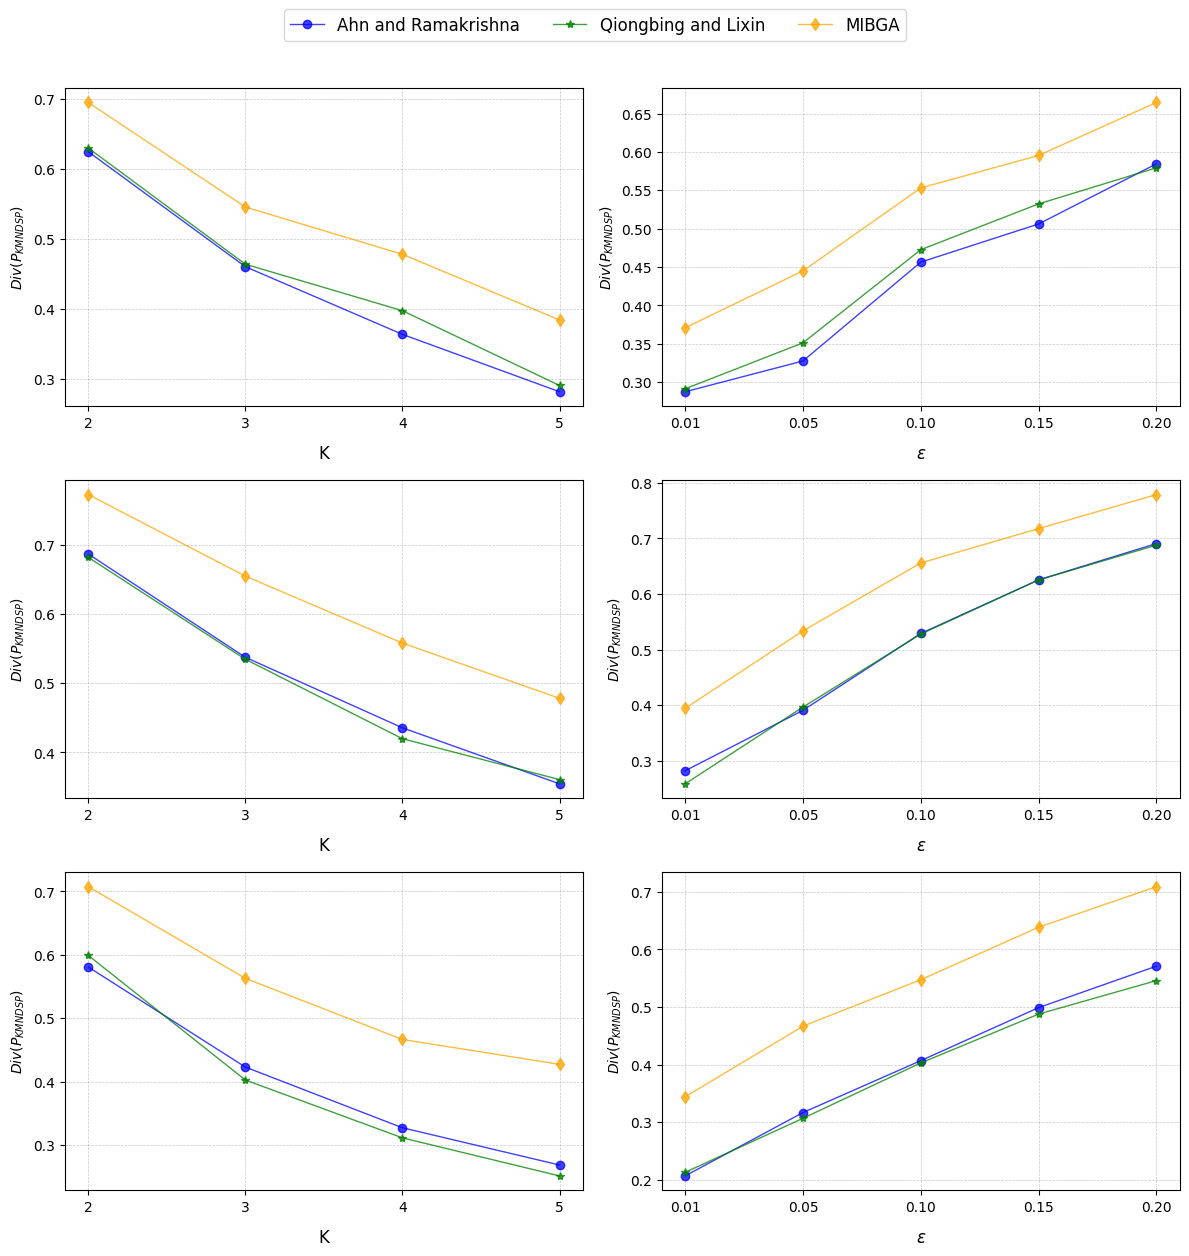

In [30]:
dis_per_thresh, dis_per_k = formulating_results(results, 'dissimilarity_values')
dis_per_thresh_per_network = results_for_plot(dis_per_thresh)
dis_per_k_per_network = results_for_plot(dis_per_k)

create_subplots(dis_per_thresh_per_network, dis_per_k_per_network, y_metric="div")

## Variation in average execution time (in Seconds) with respect to the user defined parameters, the number of near shortest paths to generate ($K$) and the length threshold ($\epsilon$) is shown across the road networks of Arizona (834 nodes and 1,547 edges), Washington (1,564 nodes and 2,784 edges), and Kansas (2,224 nodes and 4,257 edges).

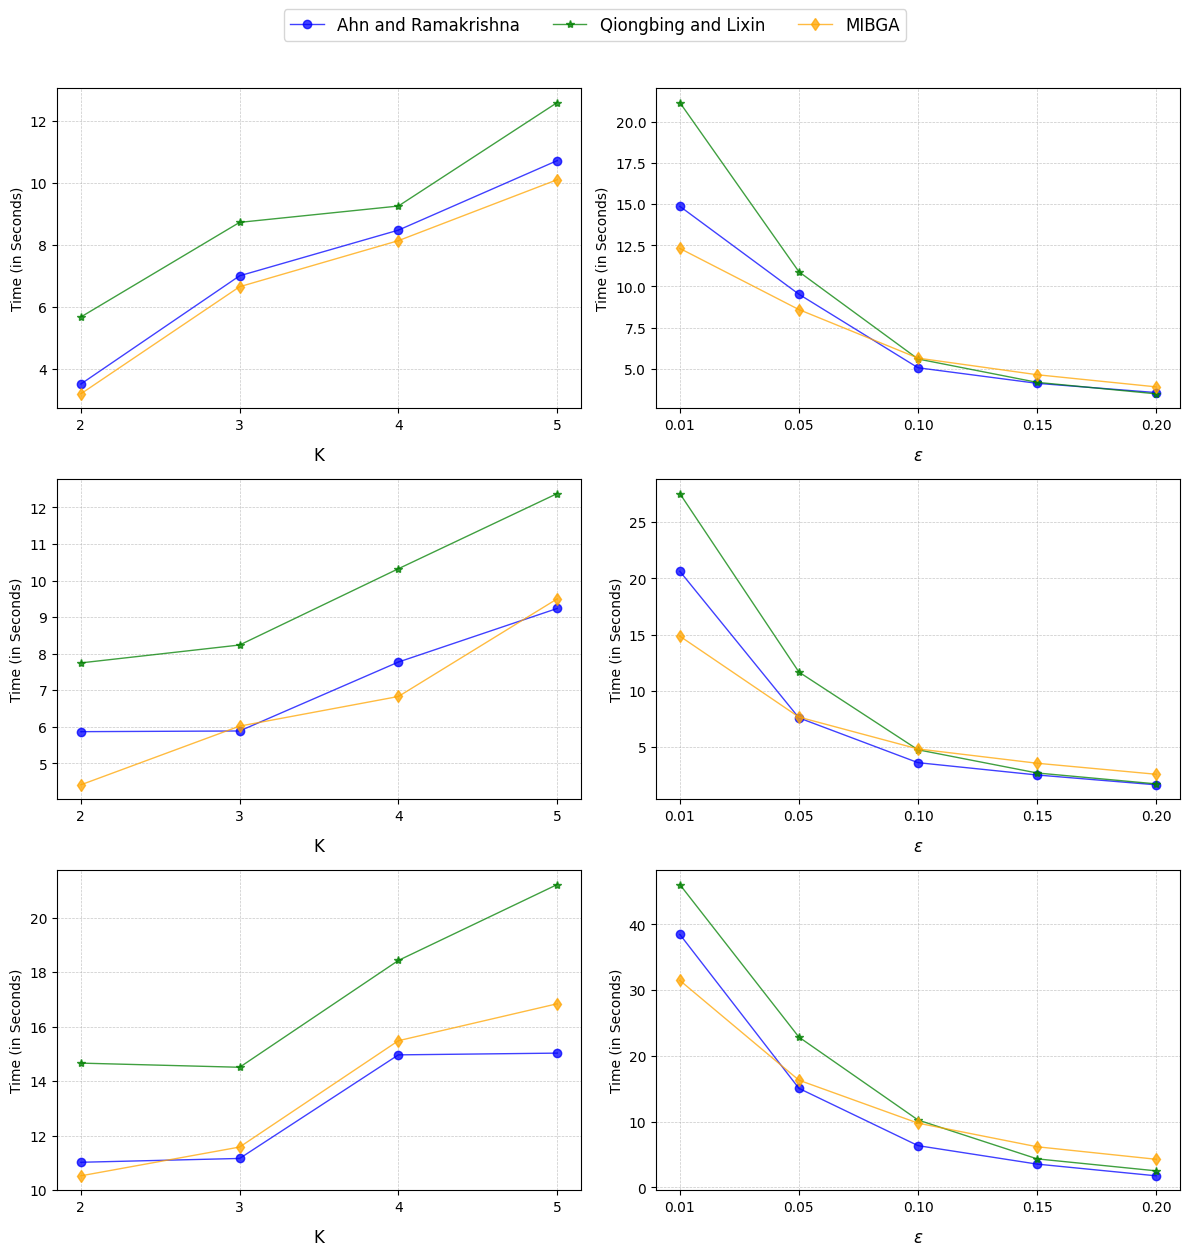

In [31]:
comp_time_per_thresh, comp_time_per_k = formulating_results(results, 'elapsed_time')

comp_time_per_thresh_per_network = results_for_plot(comp_time_per_thresh)
comp_time_per_k_per_network = results_for_plot(comp_time_per_k)

create_subplots(comp_time_per_thresh_per_network, comp_time_per_k_per_network, y_metric="time")

In [32]:
def number_of_paths_found(results):

    avg_path_found_per_algo = {}

    key_to_use = {'5_01': '(5, 0.01)', '4_01': '(4, 0.01)', '3_01': '(3, 0.01)', '2_01': '(2, 0.01)',
                  '5_05': '(5, 0.05)', '4_05': '(4, 0.05)', '3_05': '(3, 0.05)', '2_05': '(2, 0.05)',
                  '5_10' : '(5, 0.10)', '4_10' : '(4, 0.10)', '3_10' : '(3, 0.10)', '2_10' : '(2, 0.10)',
                  '5_15': '(5, 0.15)', '4_15': '(4, 0.15)', '3_15': '(3, 0.15)', '2_15': '(2, 0.15)', 
                  '5_20' : '(5, 0.20)', '4_20' : '(4, 0.20)', '3_20' : '(3, 0.20)', '2_20' : '(2, 0.20)'}


    path_count_dict = {"Ahn and Ramakrishna": {'(5, 0.01)': [], '(4, 0.01)': [], '(3, 0.01)': [], '(2, 0.01)': [],
                                                  '(5, 0.05)': [], '(4, 0.05)': [], '(3, 0.05)': [], '(2, 0.05)': [], 
                                                  '(5, 0.10)': [], '(4, 0.10)': [], '(3, 0.10)': [], '(2, 0.10)': [],
                                                  '(5, 0.15)': [], '(4, 0.15)': [], '(3, 0.15)': [], '(2, 0.15)': [], 
                                                  '(5, 0.20)': [], '(4, 0.20)': [], '(3, 0.20)': [], '(2, 0.20)': []},
                          
                            "Qiongbing and Lixin": {'(5, 0.01)': [], '(4, 0.01)': [], '(3, 0.01)': [], '(2, 0.01)': [],
                                                  '(5, 0.05)': [], '(4, 0.05)': [], '(3, 0.05)': [], '(2, 0.05)': [], 
                                                  '(5, 0.10)': [], '(4, 0.10)': [], '(3, 0.10)': [], '(2, 0.10)': [],
                                                  '(5, 0.15)': [], '(4, 0.15)': [], '(3, 0.15)': [], '(2, 0.15)': [], 
                                                  '(5, 0.20)': [], '(4, 0.20)': [], '(3, 0.20)': [], '(2, 0.20)': []},
                          
                            "MIBGA":              {'(5, 0.01)': [], '(4, 0.01)': [], '(3, 0.01)': [], '(2, 0.01)': [],
                                                  '(5, 0.05)': [], '(4, 0.05)': [], '(3, 0.05)': [], '(2, 0.05)': [], 
                                                  '(5, 0.10)': [], '(4, 0.10)': [], '(3, 0.10)': [], '(2, 0.10)': [],
                                                  '(5, 0.15)': [], '(4, 0.15)': [], '(3, 0.15)': [], '(2, 0.15)': [], 
                                                  '(5, 0.20)': [], '(4, 0.20)': [], '(3, 0.20)': [], '(2, 0.20)': []}}
                          

    for comb, results_per_comb in results.items():
        details = comb.split('_')
        network_name, paths_required, threshold = details[0], details[1], details[2]
        dict_key =  key_to_use[paths_required+"_"+threshold]
        best_paths_per_testcase = results_per_comb['best_paths']
        
        ahn_len_list_per_comb, zhang_len_list_per_comb, mibga_len_list_per_comb = [], [], []
        
        for test_count, best_paths_per_algo in best_paths_per_testcase.items():
            for algo, best_paths_list in best_paths_per_algo.items():
                
                if algo == "ahn":
                    ahn_len_list_per_comb.append(len(best_paths_list)) # placeholder = 
                elif algo == "zhang":
                    zhang_len_list_per_comb.append(len(best_paths_list)) # placeholder = 
                else:
                    mibga_len_list_per_comb.append(len(best_paths_list)) # placeholder = "MIBGA"

        
        path_count_dict["Ahn and Ramakrishna"][dict_key] = path_count_dict["Ahn and Ramakrishna"][dict_key] + ahn_len_list_per_comb
        path_count_dict["Qiongbing and Lixin"][dict_key] = path_count_dict["Qiongbing and Lixin"][dict_key] + zhang_len_list_per_comb
        path_count_dict["MIBGA"][dict_key] = path_count_dict["MIBGA"][dict_key] + mibga_len_list_per_comb

    for algo, res_dict in path_count_dict.items():
        algo_res = {}
        for comb, path_count_list in res_dict.items():
            average_path_count = round(np.mean(path_count_list)) # 100 simulations on three networks.
            std_path_count = round(np.std(path_count_list, ddof=1))                 
            algo_res[comb] = (average_path_count, std_path_count)
        avg_path_found_per_algo[algo] = algo_res
  
    return avg_path_found_per_algo
    


def avg_paths_found_plot(avg_path_found_per_algo):

    # Sample data structure simulating avg_path_found_per_algo
    data = avg_path_found_per_algo.copy()
    
    # Extract keys (conditions) and their values
    conditions = list(data['Ahn and Ramakrishna'].keys())
    methods = list(data.keys())
    
    # Set width of the bars and positions
    x = np.arange(len(conditions))  # Positions for the conditions on the x-axis
    bar_width = 0.25  # Width of each bar
    
    # Define colors for each method
    colors = [light_blue, light_green, light_orange]
    
    # Create a figure with adjusted size
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Plot each method's data as grouped bars with error bars
    for i, method in enumerate(methods):
        averages = [v[0] for v in data[method].values()]  # Extract averages
        std_devs = [v[1] for v in data[method].values()]  # Extract standard deviations
    
        # Plot bars for the current method
        ax.bar(
            x + i * bar_width, averages, width=bar_width,
            label=method, color=colors[i], edgecolor='black'
        )
    
        # Add error bars with conditional coloring
        for j in range(len(averages)):
            # Change color of the error bar if standard deviation exceeds average
            error_color = 'red' if std_devs[j] > averages[j] else 'black'
            ax.errorbar(
                x[j] + i * bar_width,
                averages[j],
                yerr=std_devs[j],
                fmt='none',  # No marker for the error bars
                color=error_color,
                capsize=4,
                elinewidth=2
            )
    
    # Add axis labels, title, and adjust font sizes
    ax.set_xlabel(r'$(K, \epsilon)$', fontsize=15, labelpad=15)
    ax.set_ylabel('Average Number of Paths', fontsize=15, labelpad=15)
    
    # Set x-tick positions and labels
    ax.set_xticks(x + bar_width / 2)  # Center x-tick labels
    ax.set_xticklabels(conditions, rotation=90, fontsize=12)  # Rotate labels for readability
    
    # Set y-tick label sizes
    ax.tick_params(axis='y', labelsize=12)  
    
    # Add legend inside the plot at the upper left corner
    ax.legend(loc='upper left', bbox_to_anchor=(0.04, 0.95), fontsize=12)
    
    # Improve layout for better fit
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Number of paths found

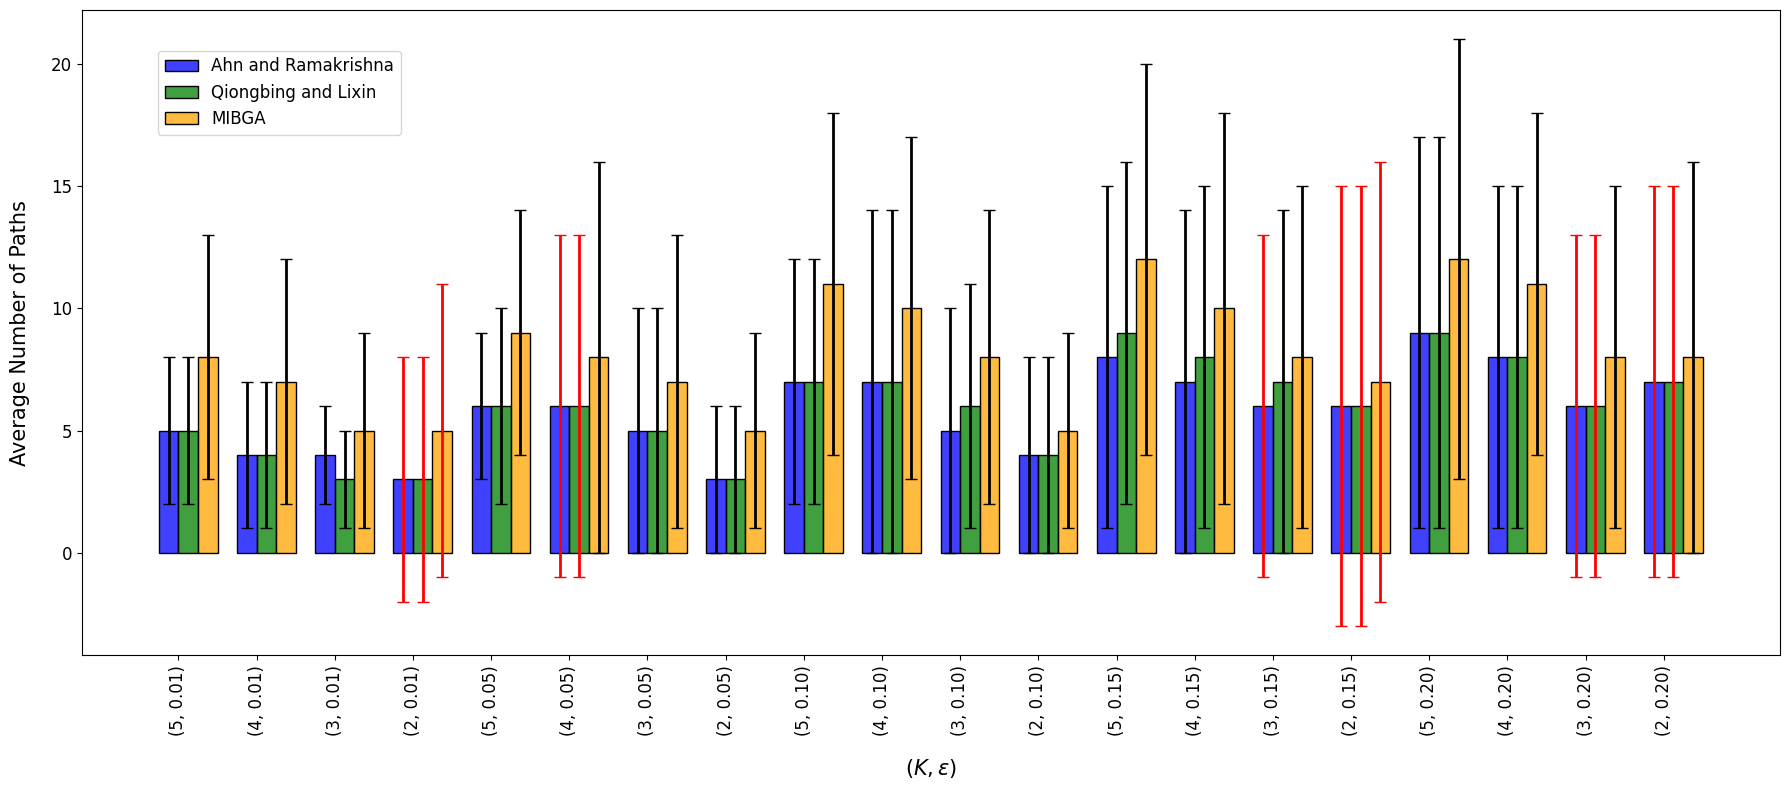

In [33]:
avg_path_found_per_algo = number_of_paths_found(results)
avg_paths_found_plot(avg_path_found_per_algo)

# Statistical Testing

In [34]:
significance_results = {}

# Original significance level
alpha = 0.05

# Bonferroni-corrected significance level
alpha_corrected = alpha / 20 # 20 possible combinations of K and \epsilon.

print(alpha_corrected)

0.0025


### **Note:- The alternative='greater' in the Wilcoxon test is used to test if the values in the first sample are significantly larger than those in the second sample.**

Please see documentation for https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [35]:
for comb, results_per_comb in results.items():     
    ahn_dissimilarity_results = results_per_comb['dissimilarity_values']['ahn']
    zhang_dissimilarity_results = results_per_comb['dissimilarity_values']['zhang']
    mibga_dissimilarity_results = results_per_comb['dissimilarity_values']['mibga']

    mibga_ahn_stat, mibga_ahn_p_value = wilcoxon(mibga_dissimilarity_results, ahn_dissimilarity_results, alternative = 'greater')
    mibga_zhang_stat, mibga_zhang_p_value = wilcoxon(mibga_dissimilarity_results, zhang_dissimilarity_results, alternative = 'greater')

    significant_to_ahn = mibga_ahn_p_value < alpha_corrected
    significant_to_zhang = mibga_ahn_p_value < alpha_corrected

    m_a = ("mibga_ahn", mibga_ahn_stat, significant_to_ahn)
    m_z = ("mibga_zhang" ,mibga_zhang_stat, significant_to_zhang)

    significance_per_comb = (m_a, m_z)

    significance_results[comb] = significance_per_comb

significance_results

{'arizona_5_01': (('mibga_ahn', 2080.0, True), ('mibga_zhang', 2285.0, True)),
 'arizona_4_01': (('mibga_ahn', 1569.0, True), ('mibga_zhang', 1315.0, True)),
 'arizona_3_01': (('mibga_ahn', 1853.0, True), ('mibga_zhang', 1814.0, True)),
 'arizona_2_01': (('mibga_ahn', 1580.0, True), ('mibga_zhang', 1646.0, True)),
 'arizona_5_05': (('mibga_ahn', 2446.0, True), ('mibga_zhang', 2468.0, True)),
 'arizona_4_05': (('mibga_ahn', 2207.0, True), ('mibga_zhang', 1923.0, True)),
 'arizona_3_05': (('mibga_ahn', 1429.0, True), ('mibga_zhang', 1271.0, True)),
 'arizona_2_05': (('mibga_ahn', 1572.0, True), ('mibga_zhang', 1576.0, True)),
 'arizona_5_10': (('mibga_ahn', 1815.0, True), ('mibga_zhang', 1708.0, True)),
 'arizona_4_10': (('mibga_ahn', 1399.0, True), ('mibga_zhang', 1233.0, True)),
 'arizona_3_10': (('mibga_ahn', 1109.0, True), ('mibga_zhang', 1049.0, True)),
 'arizona_2_10': (('mibga_ahn', 736.0, True), ('mibga_zhang', 620.0, True)),
 'arizona_5_15': (('mibga_ahn', 989.0, True), ('mibga_